In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.lib.shape_base import split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [386]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [387]:
df=pd.read_excel("/content/drive/MyDrive/DATA PYTHON/Election_Data (2).xlsx",sheet_name="Election_Dataset_Two Classes")

In [388]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [ ]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

Unamed has no meaning for the column so we can drop it.

In [389]:
df.duplicated().sum()

0

We can see there are duplicated 8 rows so we need to remove

In [390]:
df.drop_duplicates(inplace=True)

In [391]:
df.shape

(1525, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [ ]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


Age minimun is 24 and average age  is 53 and max age is 93 in the data set.

Economic condition national and household are rated by tthe people is average and most  is 3 and maximum is 5 in the data set.

Blair support by the people is very positive more than 75% shows that blair has best leader.

Hague support by the people is very average show the poor leadership.

Europe integration are support to average 6 that vary from 11. it show only 40% are interested.

Political knowledge most of the most have much knowledge as 2 to 3 is been average


##Observation:

There are Totaly 10 column and 1524 rows with 0 null values for each feature

Vote and Gender are Object and the rest are all integer Data type.

Unnamed 0 feature to be removed becasue no meaning insight can be driven.

There are 8 duplicated in the Row are to be removed.



##UNIVARITE ANALYSIS:

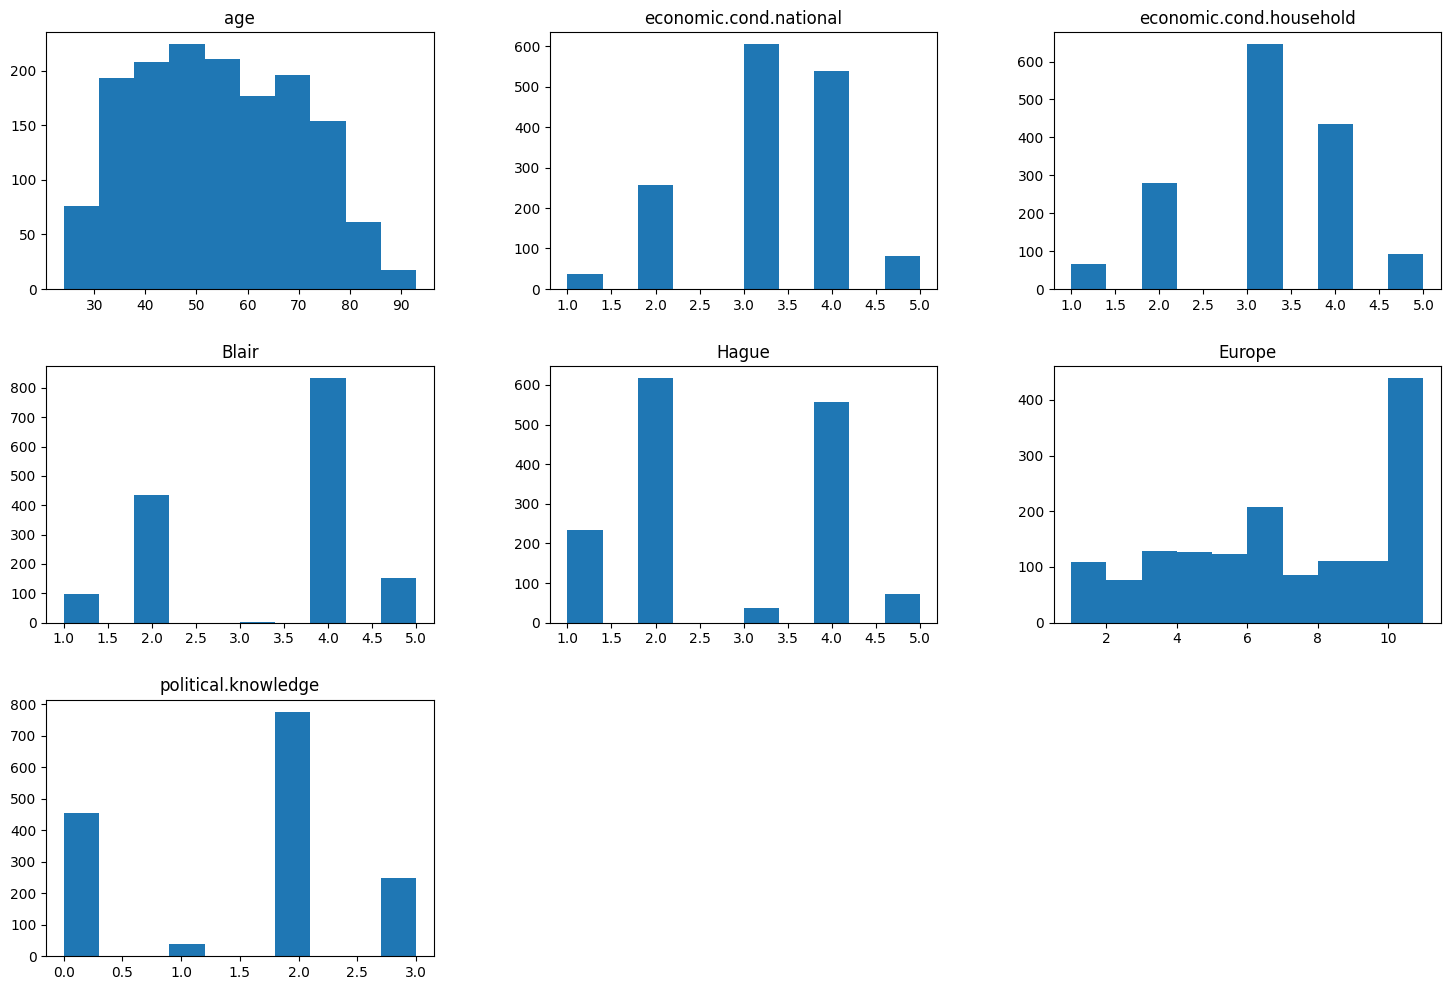

In [ ]:
df.hist(figsize=(18,12),grid=False);

We can see that none OF the column are Normaly distributed.

1) What is the distribution of respondents among different political parties?

(array([0, 1]), [Text(0, 0, 'Labour'), Text(1, 0, 'Conservative')])

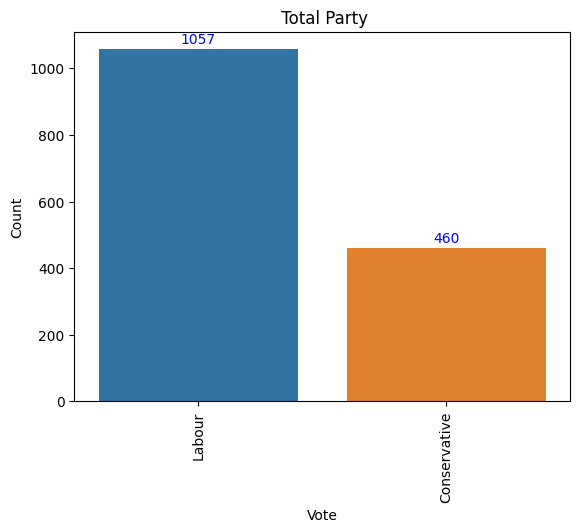

In [ ]:
db=sns.countplot(data=df,x="vote");
db.bar_label(db.containers[0],color='blue',fontsize=10, padding=2);
plt.title(" Total Party")
plt.xlabel("Vote")
plt.ylabel("Count")
plt.xticks(rotation=90)

THE Labour are 1057

The conservative are 460

2) What is the gender distribution of the respondents in the dataset?

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

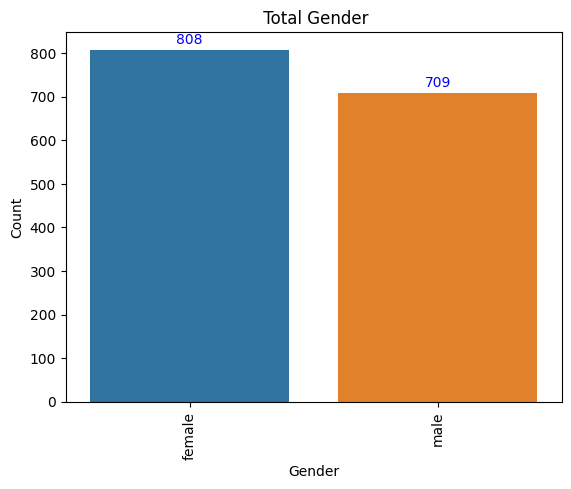

In [ ]:
ds=sns.countplot(data=df,x="gender");
ds.bar_label(ds.containers[0],color='blue',fontsize=10, padding=2);
plt.title(" Total Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=90)

The Female are 808

The Male are 709

Female are more compared to men

3)What is the distribution of respondents' knowledge levels of parties' positions on European integration?

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

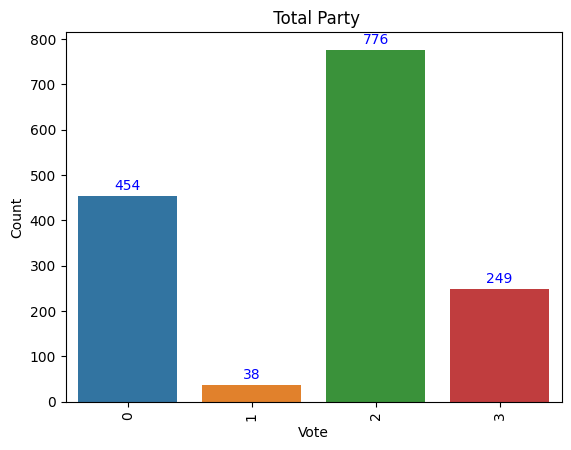

In [ ]:
db=sns.countplot(data=df,x="political.knowledge");
db.bar_label(db.containers[0],color='blue',fontsize=10, padding=2);
plt.title(" Total Party")
plt.xlabel("Vote")
plt.ylabel("Count")
plt.xticks(rotation=90)

The value of 0 indicate that 454 has no knowledge or awareness of the positions that political parties hold on European integration.

The value of  1  indidcate that 38 have limited knowledge of the polictical parties hold on European integration but they dont have much knowlege.

The value of 2 indicate that 776 have Moderate knowledge the polictical parties hold on European integration

The value of 3 indicate that 249  have High knowlege of the polictical parties hold on European integration

## BIVARIATE ANALYSIS

4)How does the economic condition (national) vary across different levels of the factor related to Blair?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

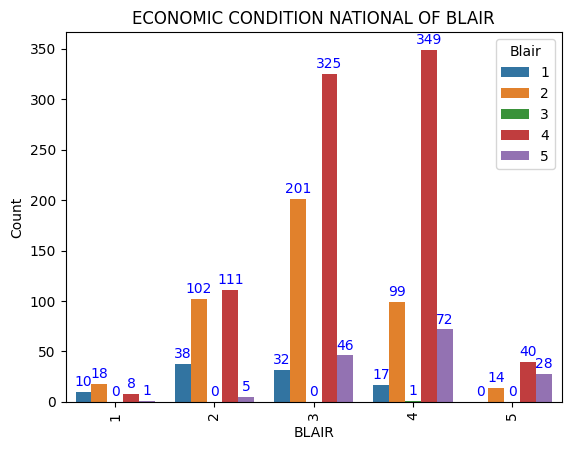

In [ ]:
dd=sns.countplot(data=df,x="economic.cond.national",hue="Blair");
dd.bar_label(dd.containers[0],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[1],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[2],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[3],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[4],color='blue',fontsize=10, padding=2);
plt.title("ECONOMIC CONDITION NATIONAL OF BLAIR")
plt.xlabel("BLAIR")
plt.ylabel("Count")
plt.xticks(rotation=90)

WE CAN CLEARLY SAY ECONOMIC CONDITION NATIONAL OF BLAIR HAS GREATE VALUE IN 4 IT INDICATE THAT ECONOMIC CONDITION IS IN POSITIVE

IN THE LEADERSHIP OF BLAIR

5) How does the economic condition (national) vary across different levels of the factor related to Hague?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

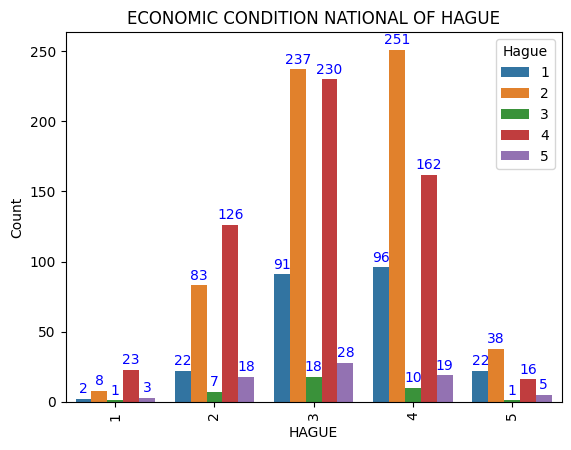

In [ ]:
dd=sns.countplot(data=df,x="economic.cond.national",hue="Hague");
dd.bar_label(dd.containers[0],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[1],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[2],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[3],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[4],color='blue',fontsize=10, padding=2);
plt.title("ECONOMIC CONDITION NATIONAL OF HAGUE")
plt.xlabel("HAGUE")
plt.ylabel("Count")
plt.xticks(rotation=90)

THE ECONOMIC CONDITION NATION IS MIXED WITH AVERAGE AND POSITIVE WITH THE LEADERSHIP UNDER HAGUE

6) Which level of the factor related to HAGUE appears to have the highest proportion of respondents with positive household economic perceptions?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

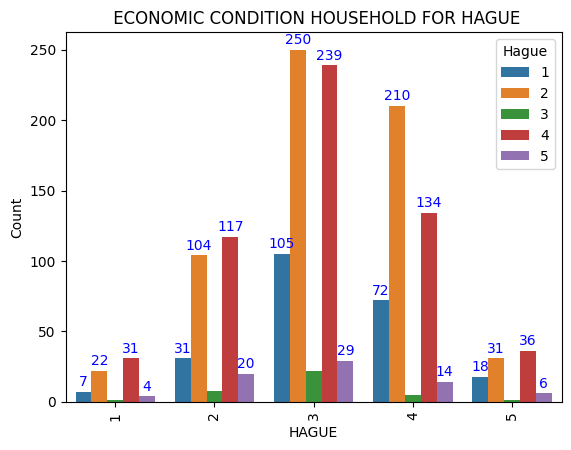

In [ ]:
dd=sns.countplot(data=df,x="economic.cond.household",hue="Hague");
dd.bar_label(dd.containers[0],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[1],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[3],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[4],color='blue',fontsize=10, padding=2);
plt.title(" ECONOMIC CONDITION HOUSEHOLD FOR HAGUE")
plt.xlabel("HAGUE")
plt.ylabel("Count")
plt.xticks(rotation=90)

THE ECONOMIC CONDITION HOUSEHOLD ALSO HAVE THE MIXED OF AVERAGE AND POSITIVE RATING UNDER THE LEADERSHIP OF HAGUE

7) Which level of the factor related to BLAIR appears to have the highest proportion of respondents with positive household economic perceptions?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

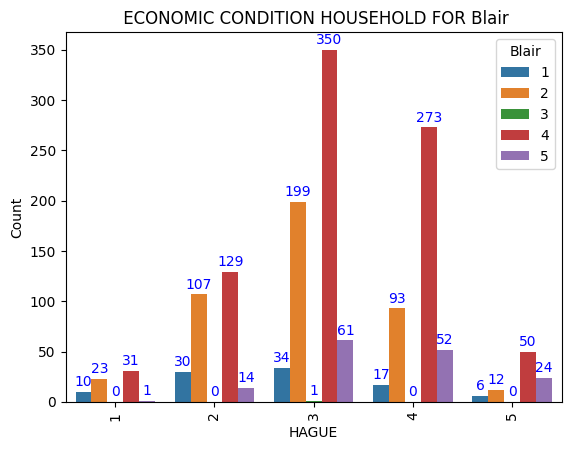

In [ ]:
dd=sns.countplot(data=df,x="economic.cond.household",hue="Blair");
dd.bar_label(dd.containers[0],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[1],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[2],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[3],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[4],color='blue',fontsize=10, padding=2);
plt.title(" ECONOMIC CONDITION HOUSEHOLD FOR Blair")
plt.xlabel("HAGUE")
plt.ylabel("Count")
plt.xticks(rotation=90)

THE ECONOMIC CONDITION HOUSEHOLD ALSO HAVE THE MIXED OF AVERAGE AND POSITIVE
BUT HAS THE HIGHEST RATING COMPARED WITH HAGUE , UNDER THE LEADERSHIP OF BLAIR ECONOMIC CONDITION IS VERY GOOD

8) How does the distribution of respondents across different levels of "Blair" vary by gender?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

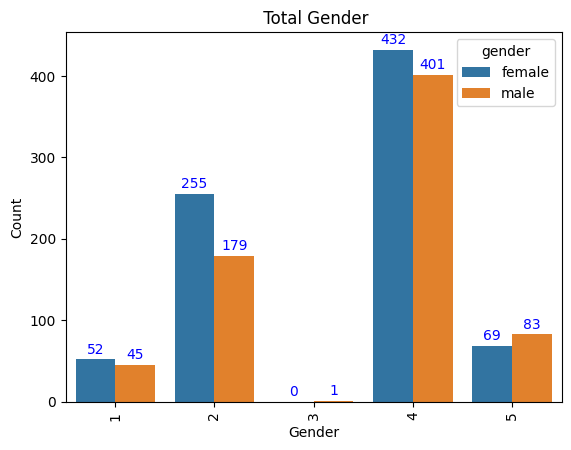

In [ ]:
dd=sns.countplot(data=df,x="Blair",hue="gender");
dd.bar_label(dd.containers[0],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[1],color='blue',fontsize=10, padding=2);
plt.title(" Total Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=90)

The value of 1 indicate that Female of 52 and Male of 45 says that negative or low ledership of blair labour leader.

The value of 2 indicate that Female of 255 and Male of 179 says that somewhat negative ledership of blair labour leader

The value of 3 indicate that Female of 0 and Male of 1 says that  Moderate  ledership of blair labour leader its show nor stronge or nor poor leadership.

The value of 4 indicate that Female of 432 and Male of 401 says that Some what Postive ledership of blair labour leader .Its indicate that the leader achivements.

The value of 5 indicate that Female of 69 and Male of 83 says that  of Stronge positive blair labour leader increases the employment,income facility and increases quality of life.

9) 8) How does the distribution of respondents across different levels of HAGUE vary by gender?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

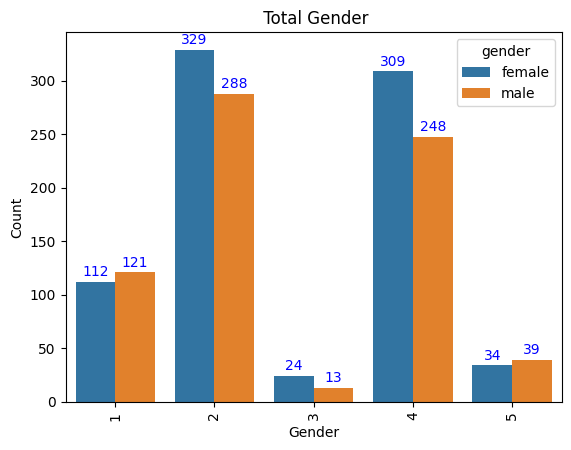

In [ ]:
dd=sns.countplot(data=df,x="Hague",hue="gender");
dd.bar_label(dd.containers[0],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[1],color='blue',fontsize=10, padding=2);
plt.title(" Total Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=90)

The value of 1 indicate that Female of 112 and Male of 121 says that negative or low ledership of Hague conservative leader.

The value of 2 indicate that Female of 329 and Male of 288 says that somewhat negative ledership of Hague conservative leader.

The value of 3 indicate that Female of 24 and Male of 13 says that  Moderate  ledership of Hague conservative leader. its show nor stronge or nor poor leadership.

The value of 4 indicate that Female of 309 and Male of 248 says that Some what Postive ledership of Hague conservative leader.Its indicate that the leader achivements.

The value of 5 indicate that Female of 34 and Male of 39 says that  of Stronge positive Hague conservative leader the employment,income facility and increases quality of life.

10) How does the distribution of respondents' preferences for Hague vary across different levels of political knowledge?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

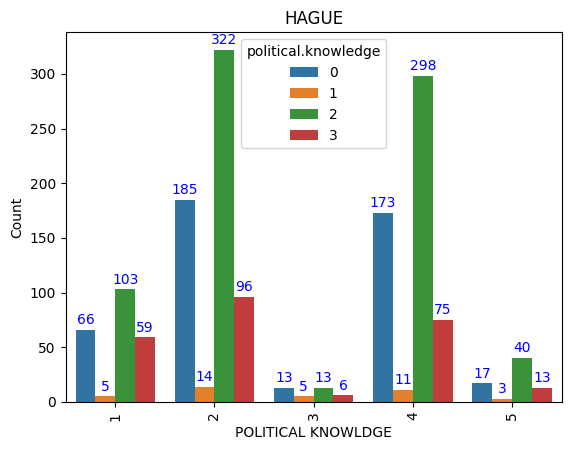

In [ ]:
dd=sns.countplot(data=df,x="Hague",hue="political.knowledge");
dd.bar_label(dd.containers[0],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[1],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[2],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[3],color='blue',fontsize=10, padding=2);
plt.title("HAGUE")
plt.xlabel("POLITICAL KNOWLDGE")
plt.ylabel("Count")
plt.xticks(rotation=90)

THE POLITICAL KNOWLEGHE OF HAGUE ITS LOW AND AVERAGE.

110 How does the distribution of respondents' preferences for Blair vary across different levels of political knowledge?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

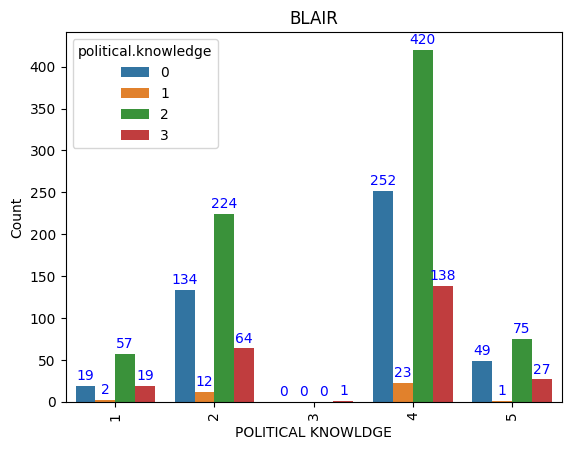

In [ ]:
dd=sns.countplot(data=df,x="Blair",hue="political.knowledge");
dd.bar_label(dd.containers[0],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[1],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[2],color='blue',fontsize=10, padding=2);
dd.bar_label(dd.containers[3],color='blue',fontsize=10, padding=2);
plt.title("BLAIR")
plt.xlabel("POLITICAL KNOWLDGE")
plt.ylabel("Count")
plt.xticks(rotation=90)

THE POLITICAL KNOWLEGHE OF BLAIR HAS VERY GOOD.

##MULTIVARIATE

<Figure size 1000x1900 with 0 Axes>

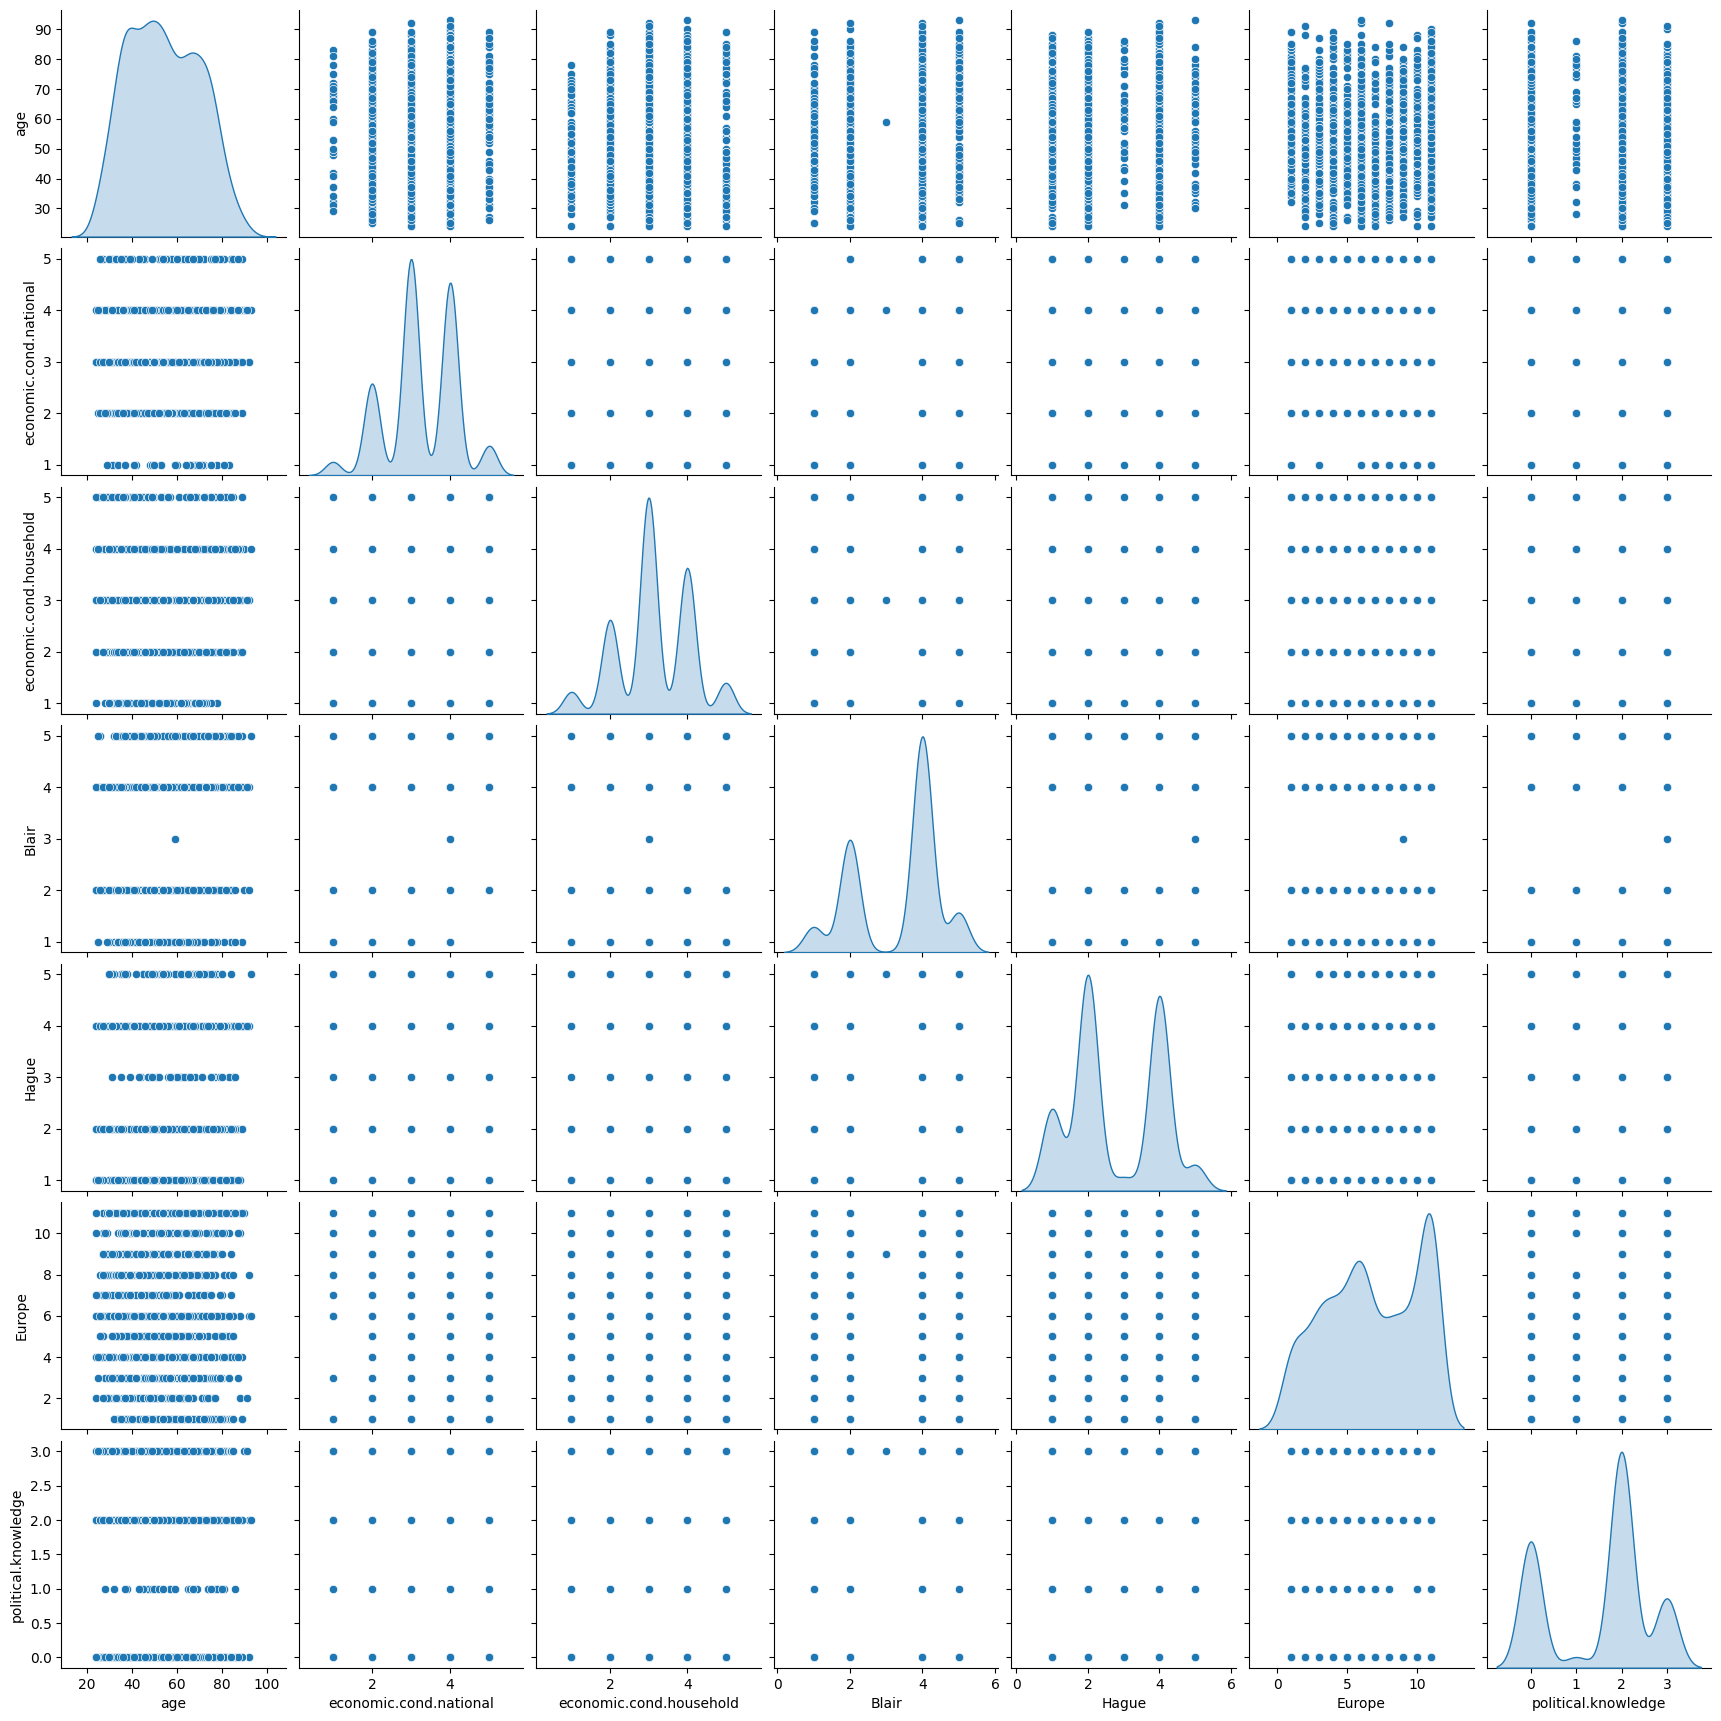

In [ ]:
plt.figure(figsize=(10,19))
sns.pairplot(data=df,diag_kind='kde')

The pariplot shows that there is no relationship with each others.

We can national and house hold has the left tail which is mean by there can be outliers.

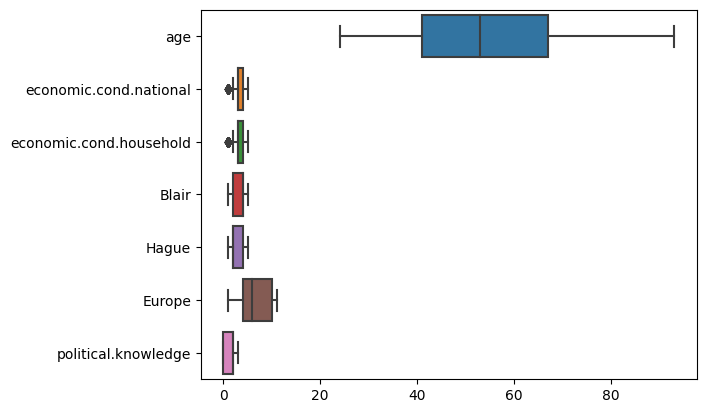

In [ ]:
sns.boxplot(data=df,orient='h');

There are Outlier in National and Household.

Will check the proportion Whether need to be removed are not

In [ ]:
columns_to_check = ['economic.cond.national', 'economic.cond.household']

# Calculate the IQR boundaries for each column
outliers = pd.DataFrame(columns=columns_to_check)

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers for the column
    column_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    # Calculate the proportion of outliers for the column
    proportion = column_outliers / len(df)

    # Store the proportion in the DataFrame
    outliers.loc['Proportion', column] = proportion

print("Outlier proportions:")
print(outliers)

# Example of what to do based on the outlier proportions
threshold = 0.05  # Adjust this threshold as needed

for column in columns_to_check:
    if outliers.loc['Proportion', column] <= threshold:
        print(f"Outlier proportion for {column} is acceptable.")
        # Proceed with your analysis for this column
    else:
        print(f"Outlier proportion for {column} is high. Consider further investigation or data cleansing.")
        # Perform additional analysis or data cleansing steps for this column


Outlier proportions:
           economic.cond.national economic.cond.household
Proportion                0.02439                0.042848
Outlier proportion for economic.cond.national is acceptable.
Outlier proportion for economic.cond.household is acceptable.


we have used IQR method to check the proportion.


The national and household outlier won't impact the insights we can continue
wihtout removing the outlier

  As many machine lanaguage learning models cannot work with srting values we will encode the categorical variables and convert their data types to integer type.
  From the data type we have two categorical type variable so we can need to encode these 2 variable with the one hot encoding.

In [395]:
df["vote"].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [393]:
df["gender"].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=["vote"],drop_first="True")

We are conveting the categorical feature into binary for suppply into alogirthm

0 - FEMALE

1- MALE

In [ ]:
df=pd.get_dummies(df,columns=["gender"],drop_first="True")

We are conveting the categorical feature into binary for suppply into alogirthm

0 - LABOUR

1- CONSERVATIVE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   uint8
 8   gender_male              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 97.8 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


df['age'] = scaler.fit_transform(df['age'].values.reshape(-1, 1))

Age is the only column has to be sacled because the data is continue .

and the rest of the column are ordinal not neccesary to be scaled.

In [ ]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,-0.716161,3,3,4,1,2,2,1,0
1,-1.162118,4,4,4,4,5,2,1,1
2,-1.225827,4,4,5,2,3,2,1,1
3,-1.926617,4,2,2,1,4,0,1,0
4,-0.843577,2,2,1,1,6,2,1,1


We can only age has been scaled and the rest of the feature are same.

In [ ]:
#Independent variable
X=df.drop(["vote_Labour"],axis=1)
#Dependent variable
y=df["vote_Labour"]

In [ ]:
#spliting 70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [401]:
print("the traning set is independent : ",X_train.shape)

the traning set is independent :  (1061, 8)


In [402]:
print("the test set is independent :",X_test.shape)

the test set is independent : (456, 8)


In [403]:
print("the test set is dependent:",y_test.shape )

the test set is dependent: (456,)


In [404]:
print("the train set is dependent:",y_train.shape )

the train set is dependent: (1061,)


In [ ]:
from collections import Counter
counter=Counter(y)
counter

Counter({1: 1057, 0: 460})

We can condisider dependent varibale as vote labour

X consist of independent variable

Y consist of Dependent variable

We can split the model into X and Y to supply data point into alogorithm.

1  shows the 1057 and 0 shows the 460 its represent the data in not imbalanced data.

more than 70% in the 0 can be imbalanced data so we can consider this as the balanced data.

We are spliting the model into 70 : 30

##LOGISITIC REGRESSION

In [ ]:
log=LogisticRegression()

log.fit(X_train,y_train)

log_test=log.predict(X_test)
log_train=log.predict(X_train)

log_test_accuracy = accuracy_score(y_test,log_test)
log_train_accuracy = accuracy_score(y_train,log_train)

print("the accuracy score of test is :",log_test_accuracy)
print("the accuracy score of train is :",log_train_accuracy)

the accuracy score of test is : 0.8201754385964912
the accuracy score of train is : 0.8444863336475024


THE ACCURACY SCORE OF TEST DATA IN LOGISTC REGRESION IS 82%

THE ACCURACY SCORE OF TRAIN DATA IN LOGISTC REGRESION IS 84%

##GRID SEARCH FOR LOGISTIC REGRESSION

In [ ]:
# Create a Logistic Regression model
model_log = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create GridSearchCV instance
grid_search_log = GridSearchCV(model_log, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_log.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_log.best_params_)

# Evaluate the best model on the test set
best_model = grid_search_log.best_estimator_

accuracy = best_model.score(X_test, y_test)

log_test_pro=grid_search_log.predict(X_test)
log_train_pro=grid_search_log.predict(X_train)

accuracy_train = best_model.score(X_train, y_train)
print("Accuracy on Test Set:", accuracy)
print("Accuracy on Train Set:", accuracy_train)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Test Set: 0.8201754385964912
Accuracy on Train Set: 0.8416588124410933


THE BEST HYPERPARAMETERS FOR LOGISTIC REGRESSION IS:

C : 1  

PENALTY : 11

SOLVER : liblinear

after using hyperparameters we check the accuracy score for test and train model

THE ACCURACY SCORE OF TEST DATA IN LOGISTC REGRESION IS 82%

THE ACCURACY SCORE OF TRAIN DATA IN LOGISTC REGRESION IS 84%


THE LOGISTIC REGRESSION PERFORM SAME ACCURACY WITH OR WITHOUT ANY HYPER PARAMETER .

THE ACCURACY SCORE OF TEST DATA IN LOGISTC REGRESION IS 82%

THE ACCURACY SCORE OF TRAIN DATA IN LOGISTC REGRESION IS 84%

The model does well in both and ther is no underfit or overfit data in the accuracy

##LDA

In [ ]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

lda_train_preds = lda.predict(X_train)
lda_test_preds = lda.predict(X_test)

lda_test_accuracy=accuracy_score(y_test,lda_test_preds)
lda_train_accuracy=accuracy_score(y_train,lda_train_preds)

print("the accuracy score of test is :",lda_test_accuracy)
print("the accuracy score of train is :",lda_train_accuracy)

the accuracy score of test is : 0.8245614035087719
the accuracy score of train is : 0.8388312912346843


THE ACCURACY SCORE OF TEST DATA IN LINEAR DISCRIMINANT ANALYSIS IS 82%

THE ACCURACY SCORE OF TRAIN DATA IN LINEAR DISCRIMINANT ANALYSIS IS 84%


##LDA GRID SEARCH

In [ ]:
# Create LDA model
model_LDA = LinearDiscriminantAnalysis()

# Define the hyperparameter grid
param_grid = {
    'n_components': [1, 2, 3, 4],
    'solver': ['svd', 'lsqr', 'eigen']
}

# Create GridSearchCV instance
grid_search_lda = GridSearchCV(model_LDA, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_lda.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_lda.best_params_)

# Evaluate the best model on the test set
best_model = grid_search_lda.best_estimator_

accuracy = best_model.score(X_test, y_test)
accuracy_train = best_model.score(X_train, y_train)
print("Accuracy on Test Set:", accuracy)

print("the accuracy score of train is :",accuracy_train)


Best Hyperparameters: {'n_components': 1, 'solver': 'svd'}
Accuracy on Test Set: 0.8245614035087719
the accuracy score of train is : 0.8388312912346843


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 608, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/model_


The best Hyperparameter for lda are:

n_components : 1  

solver : svd

After using the hyper parameter  accuracy score are:

THE ACCURACY SCORE OF TEST DATA IN LINEAR DISCRIMINANT ANALYSIS IS 82%

THE ACCURACY SCORE OF TRAIN DATA IN LINEAR DISCRIMINANT ANALYSIS IS 84%

THE LINEAR DISCRIMINANT ANALYSIS PERFORM SAME ACCURACY WITH OR WITHOUT ANY HYPER PARAMETER .

THE ACCURACY SCORE OF TEST DATA IN LINEAR DISCRIMINANT ANALYSIS IS 82%

THE ACCURACY SCORE OF TRAIN DATA IN LINEAR DISCRIMINANT ANALYSISIS 84%

The model does well in both and ther is no underfit or overfit data in the accuracy


## KNN MODEL

In [ ]:
NNH = KNeighborsClassifier(n_neighbors=5, weights='distance')
NNH.fit(X_train,y_train)

nnh_test_pred=NNH.predict(X_test)
nnh_train_pred=NNH.predict(X_train)

nnh_test_accuracy=accuracy_score(y_test,nnh_test_pred)
nnnh_train_accuracy=accuracy_score(y_train,nnh_train_pred)

print("the accuracy score of test is :",nnh_test_accuracy)
print("the accuracy score of train is :",nnnh_train_accuracy)

the accuracy score of test is : 0.8201754385964912
the accuracy score of train is : 0.9990574929311969


THE ACCURACY SCORE OF TEST DATA IN KNN  IS 82%

THE ACCURACY SCORE OF TRAIN DATA IN KNN IS 100%

IF THE ACCURACY OF TRAIN DATA SCORE VARY THE RANGE MORE THAN 100% WE CAN CONSIDER IT AS AN OVERFIT MODEL.

HERE WE CAN SEE THAT TEST DATA IS 82 % BUT THE TRAIN DATA IS 100 % THESE MODEL IS CONSIDER AS THE OVERFIT MODEL.



##GRID SEARCH KNN

In [ ]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Different values of k
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Create a k-NN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Test accuracy: 0.8092105263157895


The best hyperparameter for the model are:

metric : mahanttan

n_neighbors : 9

weighths: uniform

and the test accuray of knn is 81%

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=9, weights='uniform',metric="manhattan")
KNN.fit(X_train,y_train)

knn_test_pred=KNN.predict(X_test)
knn_train_pred=KNN.predict(X_train)

Knn_test_accuracy=accuracy_score(y_test,knn_test_pred)
Knn_train_accuracy=accuracy_score(y_train,knn_train_pred)

print("the accuracy score of test is :",Knn_test_accuracy)
print("the accuracy score of train is :",Knn_train_accuracy)

the accuracy score of test is : 0.8092105263157895
the accuracy score of train is : 0.8576814326107446


AFTER APPLYING THE GRID SEARCH CV FOR KNN MODE

THE ACCURACY SCORE TEST DATA FOR THE KNN MODEL IS 81%

THE ACCURACY SCORE TRAIN DATA FOR THE KNN MODEL IS 86%

FROM 100% TO IT BECOME 86% NOW THERE IS NO OVER FIT IN THE MODEL.

##NAVIEE

In [ ]:
navie = GaussianNB()
navie.fit(X_train,y_train)

navie_train_preds = navie.predict(X_train)
navie_test_preds  = navie.predict(X_test)

navie_test_accuracy=accuracy_score(y_test,navie_test_preds)
navie_train_accuracy=accuracy_score(y_train,navie_train_preds)

print("the accuracy score of test is :",navie_test_accuracy)
print("the accuracy score of train is :",navie_train_accuracy)

the accuracy score of test is : 0.8157894736842105
the accuracy score of train is : 0.8407163053722903


THE ACCURACY SCORE OF TEST DATA IN NAVIE IS 82%

THE ACCURACY SCORE OF TRAIN DATA IN NAVIE IS 84%

##NAVIEE GRID SEARCH

In [ ]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# Create a k-NN classifier
navie = GaussianNB()

# Perform GridSearchCV with 5-fold cross-validation
gs_NB = GridSearchCV(estimator=navie, param_grid=params_NB, cv=5,verbose=1,scoring='accuracy')
gs_NB.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", gs_NB.best_params_)

# Evaluate the model on the test set
best_model = gs_NB.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
TRAIN_aCCURACY=best_model.score(X_train, y_train)
print("Test accuracy:", test_accuracy)
print("Train accuracy:",TRAIN_aCCURACY)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'var_smoothing': 0.01}
Test accuracy: 0.8157894736842105
Train accuracy: 0.8416588124410933



The best Hyperparameter for Gaussian navie bayes are:

var_smoothing : 0.01  


After using the hyper parameter  accuracy score are:

THE ACCURACY SCORE OF TEST DATA IN Gaussian navie bayes IS 82%

THE ACCURACY SCORE OF TRAIN DATA IN Gaussian navie bayes IS 84%

THE Gaussian navie bayes PERFORM SAME ACCURACY WITH OR WITHOUT ANY HYPER PARAMETER .

THE ACCURACY SCORE OF TEST DATA IN Gaussian navie bayes IS 82%

THE ACCURACY SCORE OF TRAIN DATA IN Gaussian navie bayes 84%

The model does well in both and ther is no underfit or overfit data in the accuracy

##BAGGING CLASSIFIER

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
bag_model=BaggingClassifier(base_estimator=DecisionTreeClassifier ,n_estimators=50,random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Create an instance of the base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_depth=5)

# Create a BaggingClassifier instance and fit the model
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
bagging_preds = bagging_model.predict(X_test)
bagging_train=bagging_model.predict(X_train)

# Calculate accuracy score
bagging_accuracy = accuracy_score(y_test, bagging_preds)
bagging_accuracy_train = accuracy_score(y_train, bagging_train)

print("Bagging Accuracy test:", bagging_accuracy)
print("Bagging Accuracy train :", bagging_accuracy_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy test: 0.8092105263157895
Bagging Accuracy train : 0.88124410933082


THE ACCURACY SCORE OF TEST DATA IN BBAGGING IS 81%


THE ACCURACY SCORE OF TRAIN DATA IN BAGGING IS 88%


The model is not overfir ot underfit but its near to be an overfit.

#BAGGING CLASSIFIER FOR GRID SEARCH CV

In [ ]:
base_estimator = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=123)
bagging_params = {
    'n_estimators': [10, 50, 100],
    'base_estimator__max_depth': [None, 5, 10],
}
grid_bag=GridSearchCV(estimator=bagging_model ,param_grid=bagging_params ,cv=5)
grid_bag.fit(X_train,y_train)
print("The best performance is:",grid_bag.best_params_)

train_bag=grid_bag.predict(X_train)
test_bag=grid_bag.predict(X_test)

bagg_Accuracy=accuracy_score(y_test,test_bag)
baggg_accuracy=accuracy_score(y_train,train_bag)

print("The test accuracy is",bagg_Accuracy)
print("The train accuracy is",baggg_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

The best performance is: {'base_estimator__max_depth': 5, 'n_estimators': 10}
The test accuracy is 0.8114035087719298
The train accuracy is 0.8718190386427899


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



The best Hyperparameter for BAGGING CLASSIFIER  are:

BSE ESTIMATOR_MAX DEPTH: 5

N_ESTIMATORS : 10  

After using the hyper parameter  accuracy score are:

THE ACCURACY SCORE OF TEST DATA IN BAGGING CLASSIFIER   IS 81%

THE ACCURACY SCORE OF TRAIN DATA IN BAGGING CLASSIFIER   IS 87%

##RANDOM FOREST

In [ ]:
random=RandomForestClassifier(n_estimators=50, random_state=123,max_features=12)
random.fit(X_train,y_train)

random_test=random.predict(X_test)
random_train=random.predict(X_train)

random_test_accuracy=accuracy_score(y_test,random_test)
random_train_accuracy=accuracy_score(y_train,random_train)

print("the accuracy score of test is :",random_test_accuracy)
print("the accuracy score of train is :",random_train_accuracy)

the accuracy score of test is : 0.8026315789473685
the accuracy score of train is : 0.9990574929311969


THE ACCURACY SCORE OF TEST DATA IN RANDOM FOREST  IS 81%

THE ACCURACY SCORE OF TRAIN DATA IN RANDOM FOREST IS 87%

##RANDOM FOREST GRID SEARCH CV

In [ ]:
rf = {
  'n_estimators':[10, 50, 100],
   'max_depth': [None, 5 ,10],
}

rf_model1 = RandomForestClassifier(random_state=42)
rf_grid1 = GridSearchCV(estimator=rf_model1, param_grid=rf, cv=5)
rf_grid1.fit(X_train, y_train)
rf_preds1 = rf_grid1.predict(X_test)
rf_accuracy1 = accuracy_score(y_test, rf_preds1)
print("Random Forest Accuracy:", rf_accuracy1)
print("Random Forest Best Parameters:", rf_grid1.best_params_)

Random Forest Accuracy: 0.8114035087719298
Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 50}


THE BEST HYPERPARAMETER FOR RANDOM FOREST IS :
MAX_DEPTH : 10
N_ESTIMATORS : 5

In [ ]:
random=RandomForestClassifier(n_estimators=10, random_state=42,max_depth=5)
random.fit(X_train,y_train)
random_test_new=random.predict(X_test)
random_train_new=random.predict(X_train)
random_test = accuracy_score(y_test, random_test_new)
random_train = accuracy_score(y_train, random_train_new)
print("Bagging Accuracy test:", random_test)
print("Bagging Accuracy train :", random_train)

Bagging Accuracy test: 0.8026315789473685
Bagging Accuracy train : 0.8755890669180019


THE ACCURACY SCORE FOR TEST DATA AFTER GRID SEARCH CV FOR RANDOM FOREST IS : 80%

THE ACCURACY SCORE FOR TRAIN DATA AFTER GRID SEARCH CV FOR RANDOM FOREST IS: 88%

WE CAN USE TUNNED MODEL.

AND THERE IS NO UNDERFI TOR OVRFIT.

##GRAIDENT BOOSTING CLASSIFIER

In [ ]:
Gradient=GradientBoostingClassifier(n_estimators=50, random_state=123)
Gradient.fit(X_train,y_train)
gra_trian=Gradient.predict(X_train)
gra_test=Gradient.predict(X_test)
Train_grad=accuracy_score(y_train,gra_trian)
Test_grad=accuracy_score(y_test,gra_test)
print("The accuracy of test :",Test_grad)
print("The accuracy of train:",Train_grad)

The accuracy of test : 0.8114035087719298
The accuracy of train: 0.8765315739868049


THE ACCURACY SCORE OF TEST IN GRAIDENT BOOSTING CLASSIFIER IS 81%

THE ACCURACY SCORE OF TRAIN IN GRAIDENT BOOSTING CLASSIFIER IS 88%

##GRID SEARCH CV FOR GRADIENT BOOSTING CLASSFIER

In [ ]:
gb=GradientBoostingClassifier(random_state=1)
grad ={
    'n_estimators' :[10, 50,100],
     'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
}
grid_gd=GridSearchCV(estimator=gb, param_grid=grad, cv=5)
grid_gd.fit(X_train,y_train)
gra_trian_grid=grid_gd.predict(X_train)
gra_test_grid=grid_gd.predict(X_test)
Train_grad_grid=accuracy_score(y_train,gra_trian_grid)
Test_grad_grid=accuracy_score(y_test,gra_test_grid)
print("The accuracy of test :",Test_grad_grid)
print("The accuracy of train:",Train_grad_grid)
print("The Best performance is :",grid_gd.best_params_)

The accuracy of test : 0.8114035087719298
The accuracy of train: 0.8765315739868049
The Best performance is : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


THE BEST HYPER PARATMETER FOR GRADIENT BOOSTING CLASSFIER IS :
LEARNING RATE : 0.1

MAX DEPTH : 3

N ESTIMATE IS: 50

THE ACCURACY SCORE FOR GRID SERACH CV OF TEST IS :82%

THE ACCURACY SCORE FOR GRID SERACH CV OF TEST IS :88%

AND THE BOTH WITH AND WITHOUT HYPER PARAMTER GIVE THE SAME ACCURACY SCORE.

AND THERE IS NO OVERFIT AND UNDERFIT FOR THE MODEL.

##1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

In [ ]:
logreg_confusion_matrix = confusion_matrix(y_test, log_test_pro)
logreg_confusion_matrix

array([[ 88,  53],
       [ 29, 286]])

In [ ]:
logreg_confusion_matrix = confusion_matrix(y_train, log_train_pro)
logreg_confusion_matrix

array([[214, 105],
       [ 63, 679]])

In [ ]:
print(metrics.classification_report(y_test,log_test_pro))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       141
           1       0.84      0.91      0.87       315

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.82      0.82      0.82       456



In [ ]:
print(metrics.classification_report(y_train,log_train_pro))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       319
           1       0.87      0.92      0.89       742

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [ ]:
# Predict probabilities for the training data
train_log_a = grid_search_log.predict_proba(X_train)[:, 1]

# Predict probabilities for the testing data
test_log_a = grid_search_log.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate FPR, TPR, and thresholds for training data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_log_a)

# Calculate FPR, TPR, and thresholds for testing data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_log_a)

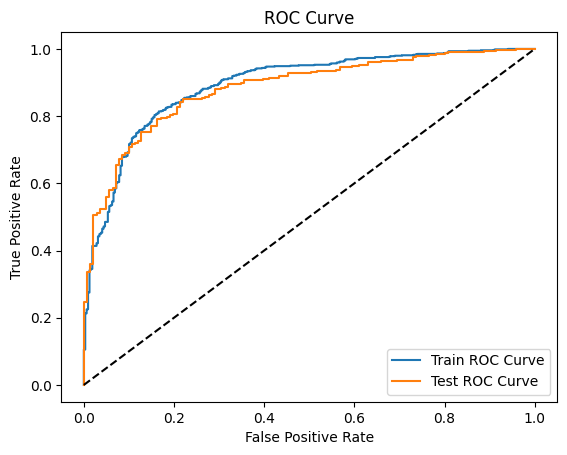

In [ ]:
# Plot the ROC curve for training data
plt.plot(train_fpr, train_tpr, label='Train ROC Curve')

# Plot the ROC curve for testing data
plt.plot(test_fpr, test_tpr, label='Test ROC Curve')

# Add labels and title to the plot
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [ ]:
# Calculate AUC score for training data
train_auc = roc_auc_score(y_train, train_log_a)

# Calculate AUC score for testing data
test_auc = roc_auc_score(y_test, test_log_a)

# Print the AUC scores
print('KNN Train AUC is:', train_auc)
print('KNN Test AUC is :', test_auc)

KNN Train AUC is: 0.89230369500376
KNN Test AUC is : 0.8827423167848699


In [ ]:
ldareg_confusion_matrix = confusion_matrix(y_test, lda_test_preds)
ldareg_confusion_matrix

array([[ 91,  50],
       [ 30, 285]])

In [ ]:
ldsreg_confusion_matrix = confusion_matrix(y_train, lda_train_preds)
ldsreg_confusion_matrix

array([[219, 100],
       [ 71, 671]])

In [ ]:
print(metrics.classification_report(y_test,lda_test_preds))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       141
           1       0.85      0.90      0.88       315

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [ ]:
print(metrics.classification_report(y_train,lda_train_preds))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       319
           1       0.87      0.90      0.89       742

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [ ]:
# Predict probabilities for the training data
train_probs_lda = grid_search_lda.predict_proba(X_train)[:, 1]

# Predict probabilities for the testing data
test_probs_bag_lda = grid_search_lda.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate FPR, TPR, and thresholds for training data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs_lda)

# Calculate FPR, TPR, and thresholds for testing data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs_bag_lda)

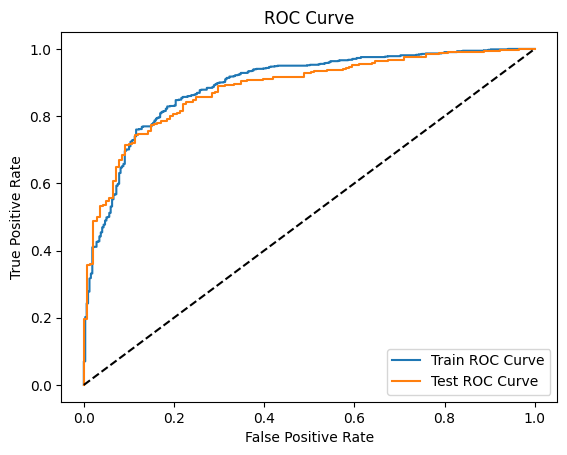

In [ ]:
# Plot the ROC curve for training data
plt.plot(train_fpr, train_tpr, label='Train ROC Curve')

# Plot the ROC curve for testing data
plt.plot(test_fpr, test_tpr, label='Test ROC Curve')

# Add labels and title to the plot
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [ ]:
# Calculate AUC score for training data
train_auc = roc_auc_score(y_train, train_probs_lda)

# Calculate AUC score for testing data
test_auc = roc_auc_score(y_test, test_probs_bag_lda)

# Print the AUC scores
print('lda Train AUC is:', train_auc)
print('lda Test AUC is :', test_auc)

lda Train AUC is: 0.8919868355457163
lda Test AUC is : 0.8820443543847799


In [ ]:
naviereg_confusion_matrix = confusion_matrix(y_test, navie_test_preds)
naviereg_confusion_matrix

array([[ 91,  50],
       [ 34, 281]])

In [ ]:
naviereg_confusion_matrix = confusion_matrix(y_train, navie_train_preds)
naviereg_confusion_matrix

array([[229,  90],
       [ 79, 663]])

In [ ]:
print(metrics.classification_report(y_test,navie_test_preds))

              precision    recall  f1-score   support

           0       0.73      0.65      0.68       141
           1       0.85      0.89      0.87       315

    accuracy                           0.82       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



In [ ]:
print(metrics.classification_report(y_train,navie_train_preds))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       319
           1       0.88      0.89      0.89       742

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [ ]:
# Predict probabilities for the training data
train_probs_navie = navie.predict_proba(X_train)[:, 1]

# Predict probabilities for the testing data
test_probs_bag_navie = navie.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate FPR, TPR, and thresholds for training data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs_navie)

# Calculate FPR, TPR, and thresholds for testing data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs_bag_navie)

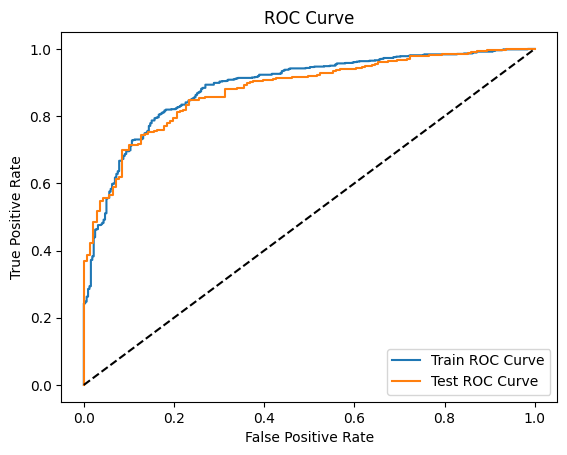

In [ ]:
# Plot the ROC curve for training data
plt.plot(train_fpr, train_tpr, label='Train ROC Curve')

# Plot the ROC curve for testing data
plt.plot(test_fpr, test_tpr, label='Test ROC Curve')

# Add labels and title to the plot
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [ ]:
# Calculate AUC score for training data
train_auc = roc_auc_score(y_train, train_probs_navie)

# Calculate AUC score for testing data
test_auc = roc_auc_score(y_test, test_probs_bag_navie)

# Print the AUC scores
print('NAVIE Train AUC is:', train_auc)
print('NAVIE Test AUC is :', test_auc)

NAVIE Train AUC is: 0.8884126608589848
NAVIE Test AUC is : 0.8786220871327254


In [ ]:
knnreg_confusion_matrix = confusion_matrix(y_test, knn_test_pred)
knnreg_confusion_matrix

array([[ 91,  50],
       [ 37, 278]])

In [ ]:
knnreg_confusion_matrix = confusion_matrix(y_train, knn_train_pred)
knnreg_confusion_matrix

array([[236,  83],
       [ 68, 674]])

In [ ]:
print(metrics.classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       141
           1       0.85      0.88      0.86       315

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456



In [ ]:
print(metrics.classification_report(y_train,knn_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       319
           1       0.89      0.91      0.90       742

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [ ]:
# Predict probabilities for the training data
train_probs_knn = KNN.predict_proba(X_train)[:, 1]

# Predict probabilities for the testing data
test_probs_knn = KNN.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate FPR, TPR, and thresholds for training data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs_knn)

# Calculate FPR, TPR, and thresholds for testing data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs_knn)

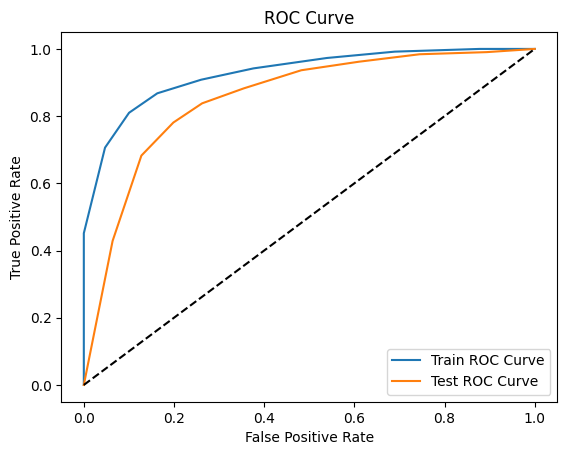

In [ ]:
# Plot the ROC curve for training data
plt.plot(train_fpr, train_tpr, label='Train ROC Curve')

# Plot the ROC curve for testing data
plt.plot(test_fpr, test_tpr, label='Test ROC Curve')

# Add labels and title to the plot
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [ ]:
# Calculate AUC score for training data
train_auc = roc_auc_score(y_train, train_probs_knn)

# Calculate AUC score for testing data
test_auc = roc_auc_score(y_test, test_probs_knn)

# Print the AUC scores
print('KNN Train AUC is:', train_auc)
print('KNN Test AUC is :', test_auc)

KNN Train AUC is: 0.9273441262706064
KNN Test AUC is : 0.8533490937746258


##BAGGING

In [ ]:
Bagging_test_confusion_matrix = confusion_matrix(y_test, test_bag)
Bagging_test_confusion_matrix

array([[ 87,  54],
       [ 32, 283]])

In [ ]:
Bagging_train_confusion_matrix = confusion_matrix(y_train, train_bag)
Bagging_train_confusion_matrix

array([[232,  87],
       [ 49, 693]])

In [ ]:
print(metrics.classification_report(y_test,test_bag))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       147
           1       0.85      0.92      0.89       311

    accuracy                           0.84       458
   macro avg       0.83      0.79      0.80       458
weighted avg       0.84      0.84      0.83       458



In [ ]:
print(metrics.classification_report(y_train,train_bag))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       319
           1       0.89      0.93      0.91       742

    accuracy                           0.87      1061
   macro avg       0.86      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061



In [ ]:
# Predict probabilities for the training data
train_probs_bag = grid_bag.predict_proba(X_train)[:, 1]

# Predict probabilities for the testing data
test_probs_bag = grid_bag.predict_proba(X_test)[:, 1]


In [ ]:
# Calculate FPR, TPR, and thresholds for training data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs_bag)

# Calculate FPR, TPR, and thresholds for testing data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs_bag)

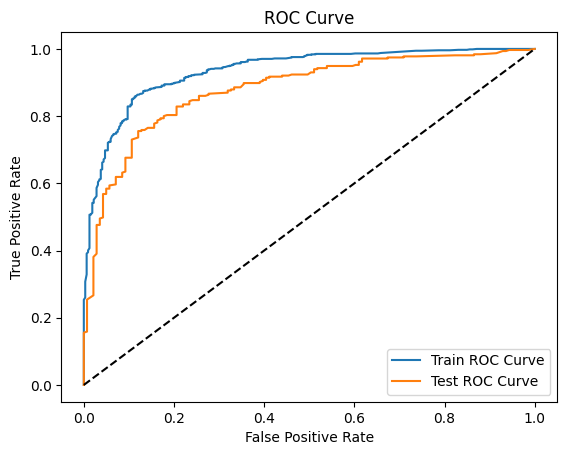

In [ ]:
# Plot the ROC curve for training data
plt.plot(train_fpr, train_tpr, label='Train ROC Curve')

# Plot the ROC curve for testing data
plt.plot(test_fpr, test_tpr, label='Test ROC Curve')

# Add labels and title to the plot
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [ ]:
# Calculate AUC score for training data
train_auc = roc_auc_score(y_train, train_probs_bag)

# Calculate AUC score for testing data
test_auc = roc_auc_score(y_test, test_probs_bag)

# Print the AUC scores
print('Bagging Train AUC is:', train_auc)
print('Bagging Test AUC is :', test_auc)

Bagging Train AUC is: 0.9343234839331132
Bagging Test AUC is : 0.8788697512101769


##RANDOM FOREST

In [ ]:
random_tes_confusion_matrix = confusion_matrix(y_test, random_test_new)
random_tes_confusion_matrix

array([[ 79,  62],
       [ 28, 287]])

In [ ]:
random_tra_confusion_matrix = confusion_matrix(y_train, random_train_new)
random_tra_confusion_matrix

array([[228,  91],
       [ 41, 701]])

In [ ]:
print(metrics.classification_report(y_test,random_test_new))

              precision    recall  f1-score   support

           0       0.74      0.56      0.64       141
           1       0.82      0.91      0.86       315

    accuracy                           0.80       456
   macro avg       0.78      0.74      0.75       456
weighted avg       0.80      0.80      0.79       456



In [ ]:
print(metrics.classification_report(y_train,random_train_new))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78       319
           1       0.89      0.94      0.91       742

    accuracy                           0.88      1061
   macro avg       0.87      0.83      0.84      1061
weighted avg       0.87      0.88      0.87      1061



In [ ]:
# Predict probabilities for the training data
train_probs_random = random.predict_proba(X_train)[:, 1]

# Predict probabilities for the testing data
test_probs_random = random.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate FPR, TPR, and thresholds for training data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs_random)

# Calculate FPR, TPR, and thresholds for testing data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs_random)

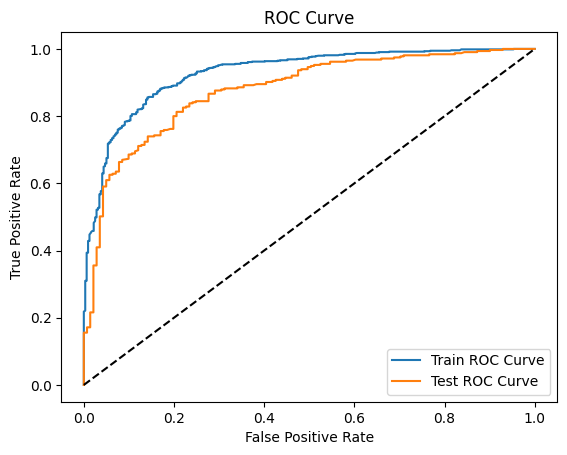

In [ ]:
# Plot the ROC curve for training data
plt.plot(train_fpr, train_tpr, label='Train ROC Curve')

# Plot the ROC curve for testing data
plt.plot(test_fpr, test_tpr, label='Test ROC Curve')

# Add labels and title to the plot
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [ ]:
# Calculate AUC score for training data
train_auc = roc_auc_score(y_train, train_probs_random)

# Calculate AUC score for testing data
test_auc = roc_auc_score(y_test, test_probs_random)

# Print the AUC scores
print('Random Forest Train AUC is:', train_auc)
print('Rndom Forest Test AUC is :', test_auc)

Random Forest Train AUC is: 0.9281151509518459
Rndom Forest Test AUC is : 0.8769222109647641


##GradientBoosting

In [ ]:
Gradient_tes_confusion_matrix = confusion_matrix(y_test, gra_test_grid)
Gradient_tes_confusion_matrix

array([[ 90,  51],
       [ 35, 280]])

In [ ]:
Gradient_tra_confusion_matrix = confusion_matrix(y_train, gra_trian_grid)
Gradient_tra_confusion_matrix

array([[238,  81],
       [ 50, 692]])

In [ ]:
print(metrics.classification_report(y_test,gra_test_grid))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       141
           1       0.85      0.89      0.87       315

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456



In [ ]:
print(metrics.classification_report(y_train,gra_trian_grid))

              precision    recall  f1-score   support

           0       0.83      0.75      0.78       319
           1       0.90      0.93      0.91       742

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.87      0.88      0.87      1061



In [ ]:
# Predict probabilities for the training data
train_probs = grid_gd.predict_proba(X_train)[:, 1]

# Predict probabilities for the testing data
test_probs = grid_gd.predict_proba(X_test)[:, 1]


In [ ]:
# Calculate FPR, TPR, and thresholds for training data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)

# Calculate FPR, TPR, and thresholds for testing data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs)

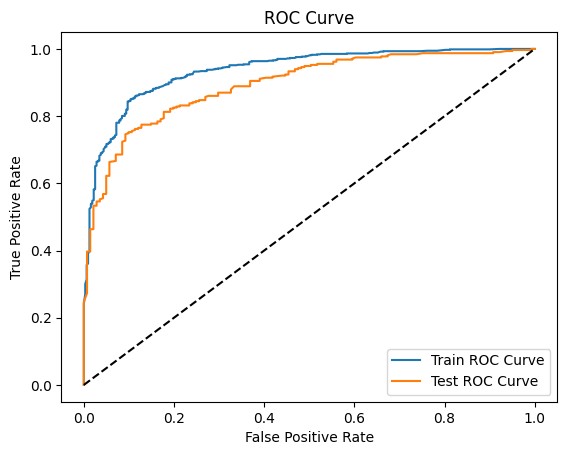

In [ ]:
# Plot the ROC curve for training data
plt.plot(train_fpr, train_tpr, label='Train ROC Curve')

# Plot the ROC curve for testing data
plt.plot(test_fpr, test_tpr, label='Test ROC Curve')

# Add labels and title to the plot
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [ ]:
# Calculate AUC score for training data
train_auc = roc_auc_score(y_train, train_probs)

# Calculate AUC score for testing data
test_auc = roc_auc_score(y_test, test_probs)

# Print the AUC scores
print('Linear regression Train AUC is:', train_auc)
print('Linear regression Test AUC is :', test_auc)

Linear regression Train AUC is: 0.9362246406813747
Linear regression Test AUC is : 0.893121693121693


Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [ ]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
nltk.download('punkt')


2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [ ]:
print("The Number of Characters  For 1941- Roosevelt:",len(inaugural.raw('1941-Roosevelt.txt')))

In [ ]:
print("The Number of words for 1941- Roosevelt:", len(inaugural.words('1941-Roosevelt.txt')))

In [ ]:
print("The Number of Sentences  For 1941- Roosevelt :",len(inaugural.sents('1941-Roosevelt.txt')))

In [ ]:
print("The Number of Characters For 1961-Kennedy.txt:",len(inaugural.raw('1961-Kennedy.txt')))

In [ ]:
print("The Number of words for 1961-Kennedy.txt :", len(inaugural.words('1961-Kennedy.txt')))

In [ ]:
print("The Number of Sentences  For 1961-Kennedy.txt :",len(inaugural.sents('1961-Kennedy.txt')))

In [ ]:
print("The Number of Characters For 1973-Nixon.txt:",len(inaugural.raw('1973-Nixon.txt')))

In [ ]:
print("The Number of words for 1973-Nixon.txt :", len(inaugural.words('1973-Nixon.txt')))

In [ ]:
print("The Number of Sentences  For 1973-Nixon.txt :",len(inaugural.sents('1973-Nixon.txt')))

2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [ ]:
nltk.download('stopwords')

In [ ]:
import string
Stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)
print(Stopwords)

In [ ]:
import re

speech_text = inaugural.raw('1941-Roosevelt.txt')

# Define stopwords
stopwords = nltk.corpus.stopwords.words('english')

# Tokenize the speech text
words = nltk.word_tokenize(speech_text)

# Define a regular expression pattern for punctuation
punctuation_pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))

# Remove stopwords and punctuation using re, and create a list of cleaned words
all_words_clean = [word.lower() for word in words if word.lower() not in stopwords and not punctuation_pattern.match(word)]

word_lengths = len(all_words_clean)

# Print the cleaned words
print(all_words_clean)

print("The words after removed stopword:",word_lengths)

freq_dist=nltk.FreqDist(all_words_clean)
for word, frequency in freq_dist.most_common(3):
    print(f"{word}: {frequency}")

In [ ]:
speech_text_1961 = inaugural.raw('1961-Kennedy.txt')

# Define stopwords
stopwords_1961 = nltk.corpus.stopwords.words('english')

# Tokenize the speech text
words = nltk.word_tokenize(speech_text_1961)

# Define a regular expression pattern for punctuation
punctuation_pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))

# Remove stopwords and punctuation using re, and create a list of cleaned words
all_words_clean_1961 = [word.lower() for word in words if word.lower() not in stopwords_1961 and not punctuation_pattern.match(word)]

# Print the cleaned words
print(all_words_clean_1961)

word_lengths_1961=len(all_words_clean_1961)

print("The words after removed stopword:",word_lengths_1961)

freq_dist=nltk.FreqDist(all_words_clean_1961)
for word, frequency in freq_dist.most_common(3):
    print(f"{word}: {frequency}")



# Print the number of words after removing stopwords
word_count = len(all_words_clean_1961)

In [ ]:
speech_text_1973 = inaugural.raw('1973-Nixon.txt')

# Define stopwords
stopwords_1973 = nltk.corpus.stopwords.words('english')

# Tokenize the speech text
words = nltk.word_tokenize(speech_text_1973)

# Define a regular expression pattern for punctuation
punctuation_pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))

# Remove stopwords and punctuation using re, and create a list of cleaned words
all_words_clean_1973 = [word.lower() for word in words if word.lower() not in stopwords_1973 and not punctuation_pattern.match(word)]

# Print the cleaned words
print(all_words_clean_1973)

freq_dist=nltk.FreqDist(all_words_clean_1973)
for word, frequency in freq_dist.most_common(3):
    print(f"{word}: {frequency}")

# Print the number of words after removing stopwords
word_count_1973 = len(all_words_clean_1973)

print("Number of words after removing stopwords:",word_count_1973)


##2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of cleaned words
cleaned_text = ' '.join(all_words_clean)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Cleaned Words')
plt.axis('off')
plt.show()

# Print the number of words after removing stopwords
word_count = len(all_words_clean)
print(f"Number of words after removing stopwords: {word_count}")


In [ ]:
# Create a string of cleaned words
cleaned_text_1961 = ' '.join(all_words_clean_1961)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text_1961)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Cleaned Words')
plt.axis('off')
plt.show()

In [ ]:
# Create a string of cleaned words
cleaned_text_1973 = ' '.join(all_words_clean_1973)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(cleaned_text_1973)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Cleaned Words')
plt.axis('off')
plt.show()